In [80]:
# Load Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# Load Ranking Files
df_rankings_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
df_rankings_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [82]:
# Glimpse of First Dataframe
df_rankings_wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [83]:
# Glimpse of Second Dataframe
df_rankings_steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [84]:
# Check Key Information of DataFrames
df_rankings_wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


Looks like Supplier Column has one null value.

In [85]:
df_rankings_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


There are no null values in this dataframe.

In [86]:
# Create a function to plot rankings over time for 1 roller coaster
def plot_rollercoaster_rank_over_time(rollercoaster, park_name ,rank_type):
    if rank_type.lower() == 'wood':
        target_df = df_rankings_wood[(df_rankings_wood['Name'] == rollercoaster) & (df_rankings_wood['Park'] == park_name)]
    elif rank_type.lower() == 'steel':
        target_df = df_rankings_steel[(df_rankings_steel['Name'] == rollercoaster) & (df_rankings_steel['Park'] == park_name)]
    year = target_df['Year of Rank']
    rank = target_df['Rank']
    title = "Ranking of {rollercoaster} in {park} Park".format(rollercoaster = rollercoaster, park = park_name)
    fig, ax  = plt.subplots()
    ax.plot(year, rank)
    ax.set_yticks(rank.values)
    ax.set_xticks(year.values)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(title)
    plt.show()

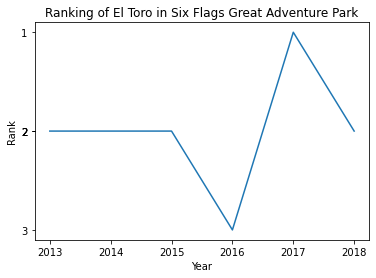

<Figure size 432x288 with 0 Axes>

In [87]:
# Create a plot of El Toro ranking over time
plot_rollercoaster_rank_over_time('El Toro', 'Six Flags Great Adventure','Wood')
plt.clf()

In [88]:
# Create a function to plot ranking of two roller coasters over time.
def plot_two_rollercoasters_rank_over_time(rollercoaster1, rollercoaster2, park_name1, park_name2 ,rank_type):
    if rank_type.lower() == 'wood':
        target_df1 = df_rankings_wood[(df_rankings_wood['Name'] == rollercoaster1) & (df_rankings_wood['Park'] == park_name1)]
        target_df2 = df_rankings_wood[(df_rankings_wood['Name'] == rollercoaster2) & (df_rankings_wood['Park'] == park_name2)]
    elif rank_type.lower() == 'steel':
        target_df1 = df_rankings_steel[(df_rankings_steel['Name'] == rollercoaster1) & (df_rankings_steel['Park'] == park_name1)]
        target_df2 = df_rankings_steel[(df_rankings_steel['Name'] == rollercoaster2) & (df_rankings_steel['Park'] == park_name2)]
    year = target_df1['Year of Rank']
    rc1_rank = target_df1['Rank']
    rc2_rank = target_df2['Rank']
    title = "{rc1} vs {rc2} Rankings".format(rc1 = rollercoaster1, rc2 = rollercoaster2)
    y_ticks = [i for i in range(1,max(max(rc1_rank.values), max(rc2_rank.values))+1)]
    fig, ax = plt.subplots()
    ax.plot(year, rc1_rank, color = "red", label = rollercoaster1)
    ax.plot(year, rc2_rank, color = "green", label = rollercoaster2)
    ax.set_yticks(y_ticks)
    ax.set_xticks(year.values)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(title)
    plt.legend()
    plt.show()

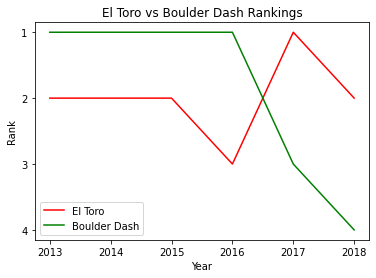

<Figure size 432x288 with 0 Axes>

In [89]:
# Create a plot of El Toro and Boulder dash hurricanes
plot_two_rollercoasters_rank_over_time('El Toro','Boulder Dash','Six Flags Great Adventure','Lake Compounce','Wood')
plt.clf()

In [90]:
# Create a function to plot top n rankings over time
def top_n_rankings_over_time(rank, rank_type):
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(1,1,1)
    if rank_type.lower() == 'wood':
        top_n_rankings = df_rankings_wood[df_rankings_wood.Rank <= rank]
    elif rank_type.lower() == 'steel':
        top_n_rankings = df_rankings_steel[df_rankings_steel.Rank <= rank]
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label = coaster)
    ax.set_yticks(range(1,rank+1))
    ax.invert_yaxis()
    plt.title('Top {} Rankings'.format(rank))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend(loc=4)
    plt.show()

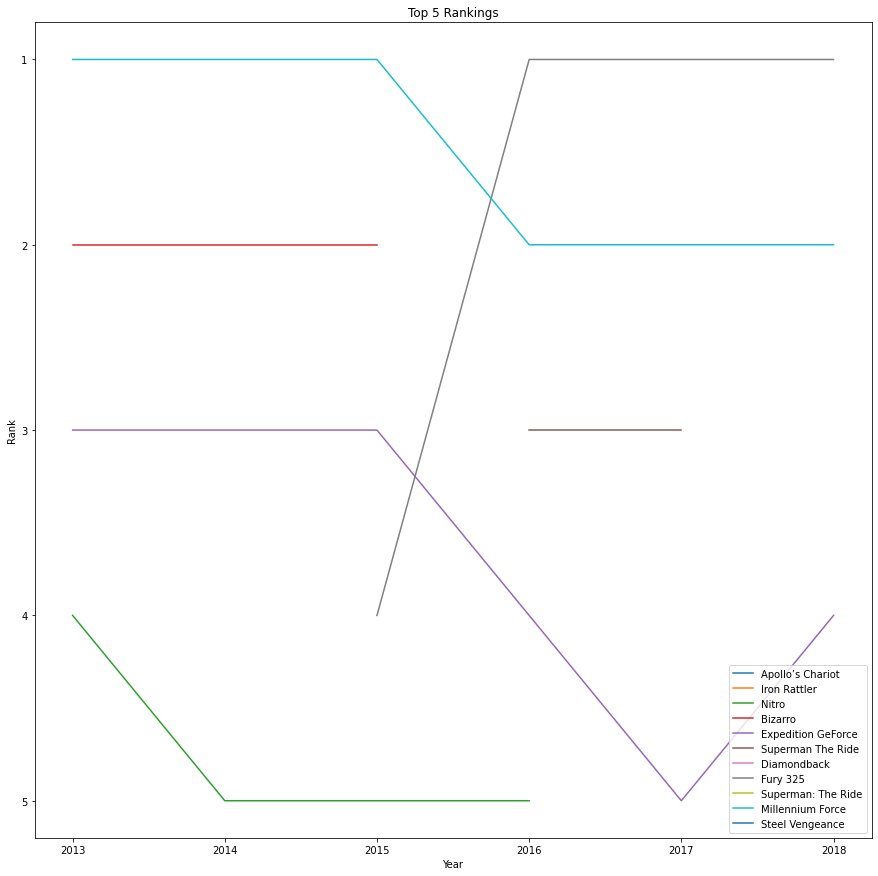

<Figure size 432x288 with 0 Axes>

In [91]:
# Create a plot of top n rankings over time
top_n_rankings_over_time(5, 'steel')
plt.clf()

In [92]:
# Load Roller-Coasters Data
df_roller_coaster = pd.read_csv("roller_coasters.csv")
df_roller_coaster.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [93]:
# Glimpse of Roller-Coaster Dataframe
df_roller_coaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [94]:
# Create Function to Remove Outliers
def remove_outliers(df, column_name):
    # Detect Outlier using IQR
    Q1 = np.percentile(df[column_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Find lower and upper bounds
    lower = np.where(df[column_name] >= (Q3 + 1.5*IQR))
    upper = np.where(df[column_name] <= (Q1 - 1.5*IQR))

    # Remove the outliers
    df[column_name].drop(lower[0], inplace = True)
    df[column_name].drop(upper[0], inplace = True)
    
    return df[column_name]

In [95]:
# Create Function to Plot Histogram
def plot_histogram(df, column_name):
    if (df[column_name].dtype == 'float'):
        plt.hist(df[column_name])
        plt.title("Histogram of Roller Coaster Attribute - {}".format(column_name))
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.show()
    else:
        print("Not a numerical column. Kindly give a valid column name.")

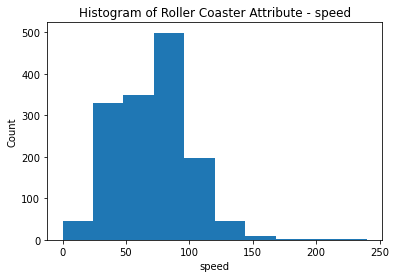

<Figure size 432x288 with 0 Axes>

In [96]:
# Drop NAs
df_roller_coaster['speed'] = df_roller_coaster['speed'].dropna().reset_index(drop = True)

# Remove Outliers
df_roller_coaster['speed'] = remove_outliers(df_roller_coaster, 'speed')

# Create histogram of roller coaster speed
plot_histogram(df_roller_coaster, 'speed')
plt.clf()

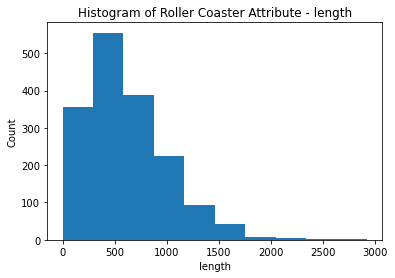

<Figure size 432x288 with 0 Axes>

In [97]:
# Drop NAs
df_roller_coaster['length'] = df_roller_coaster['length'].dropna().reset_index(drop = True)

# Remove Outliers
df_roller_coaster['length'] = remove_outliers(df_roller_coaster, 'length')

# Create histogram of roller coaster length
plot_histogram(df_roller_coaster, 'length')
plt.clf()

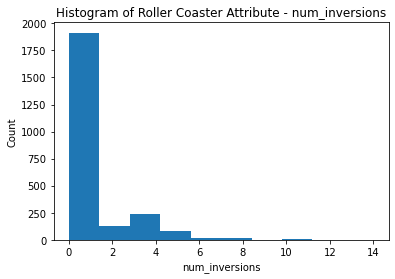

<Figure size 432x288 with 0 Axes>

In [98]:
# Drop NAs
df_roller_coaster['num_inversions'] = df_roller_coaster['num_inversions'].dropna().reset_index(drop = True)

# Remove Outliers
df_roller_coaster['num_inversions'] = remove_outliers(df_roller_coaster, 'num_inversions')

# Create histogram of roller coaster number of inversions
plot_histogram(df_roller_coaster, 'num_inversions')
plt.clf()

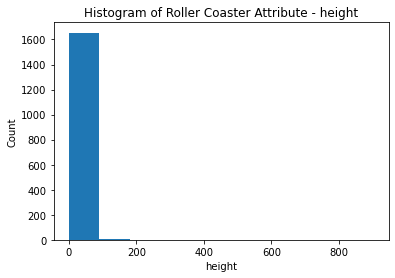

<Figure size 432x288 with 0 Axes>

In [99]:
# Drop NAs
df_roller_coaster['height'] = df_roller_coaster['height'].dropna().reset_index(drop = True)

# Remove Outliers
df_roller_coaster['height'] = remove_outliers(df_roller_coaster, 'height')

# Create a histogram of roller coaster height
plot_histogram(df_roller_coaster, 'height')
plt.clf()

In [100]:
# Create a function to plot inversions by coaster at park
def plot_bar_chart(df, park_name):
    # Filter relevant rows and sort rows based on num_inversions in descending order
    df = df[df['park'] == park_name].sort_values('num_inversions', ascending = False)
    # Set Figure Size
    fig = plt.figure(figsize = (5,5))
    # Position of Subplot
    ax = fig.add_subplot(1,1,1)
    # Plot Bar Chart
    ax.bar(range(len(df['num_inversions'])), df['num_inversions'])
    # Set ticks of X-axis
    ax.set_xticks(range(len(df['num_inversions'])))
    # Label ticks of X-axis and rotate it by 90 degrees.
    ax.set_xticklabels(df['name'], rotation = 90)
    # Label the Plot
    plt.xlabel('Roller Coaster')
    plt.ylabel('No. of Inversions')
    plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
    # Show Bar Plot
    plt.show()

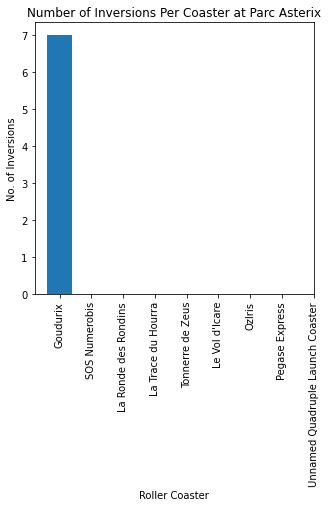

<Figure size 432x288 with 0 Axes>

In [101]:
# Create barplot of inversions by roller coasters
plot_bar_chart(df_roller_coaster, 'Parc Asterix')
plt.clf()

In [102]:
# Create a function to plot a pie chart of status.operating
def plot_pie_chart(df):
    df = df.groupby('status').size().reset_index(name = 'no_of_rows')
    operating_coasters = df[df['status'] == 'status.operating'].no_of_rows.values[0]
    closed_coasters = df[df['status'] == 'status.closed.definitely'].no_of_rows.values[0]
    plt.pie([operating_coasters, closed_coasters], labels = ['Operating', 'Closed'], autopct='%d%%')
    plt.axis('equal')
    plt.title('Pie Cart of Roller Coaster by their Operating Status')
    plt.show()

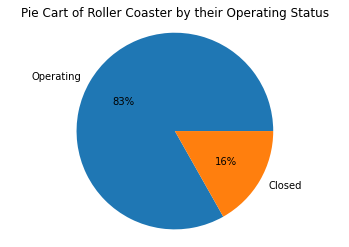

<Figure size 432x288 with 0 Axes>

In [103]:
# Create pie chart of roller coasters
plot_pie_chart(df_roller_coaster)
plt.clf()

In [104]:
# Create a function to plot scatter chart of any two columns of dataframe
def plot_scatter_chart(df, column_x, column_y):
    #Remove Outliers before plotting
    df[column_x] = remove_outliers(df, column_x)
    df[column_y] = remove_outliers(df, column_y)
    plt.scatter(df[column_x], df[column_y])
    plt.title('Scatter Plot of {} vs {}'.format(column_x, column_y))
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.show()

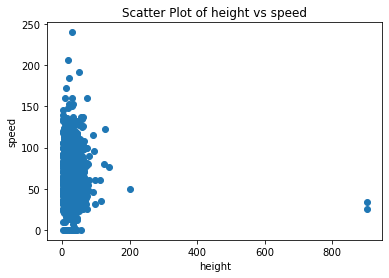

<Figure size 432x288 with 0 Axes>

In [105]:
# Create a scatter plot of roller coaster height by speed
plot_scatter_chart(df_roller_coaster, 'height','speed')
plt.clf()